In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.DataFrame(pd.read_csv("data_simplified.csv"))
df = df.set_index('alias')

In [3]:
df.describe()

,kth_canvas_usage,kth_social_usage,facebook_usage,info_vis_skill,stats_skill,maths_skill,drawing_skill,computer_skill,programming_skill,cg_skill,hci_skill,user_experience_skill,communication_skill,collaboration_skill,code_repository_skill
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,1.720930,1.325581,2.046512,3.348837,4.255814,5.348837,5.465116,7.232558,5.697674,3.302326,3.953488,3.860465,6.976744,6.744186,5.581395
std,0.503586,0.944178,0.871602,1.730452,2.012970,1.702711,2.383963,1.394500,1.958314,1.779980,1.798855,1.995010,2.375353,1.415779,2.362732
min,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000
25%,1.500000,1.000000,2.000000,2.000000,3.000000,4.500000,4.000000,7.000000,5.000000,2.000000,3.000000,2.000000,6.000000,6.000000,4.000000
50%,2.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,6.000000,3.000000,4.000000,4.000000,7.000000,7.000000,6.000000
75%,2.000000,2.000000,3.000000,5.000000,5.500000,6.000000,7.000000,8.000000,7.000000,5.000000,5.500000,6.000000,9.000000,8.000000,7.000000
max,2.000000,3.000000,3.000000,7.000000,9.000000,9.000000,10.000000,9.000000,10.000000,7.000000,7.000000,8.000000,10.000000,10.000000,10.000000


In [4]:
df.columns

Index(['major', 'kth_canvas_usage', 'kth_social_usage', 'facebook_usage',
       'info_vis_skill', 'stats_skill', 'maths_skill', 'drawing_skill',
       'computer_skill', 'programming_skill', 'cg_skill', 'hci_skill',
       'user_experience_skill', 'communication_skill', 'collaboration_skill',
       'code_repository_skill'],
      dtype='object')

/Users/felix-home/.pyenv/versions/3.7.8/envs/dh2321-python-3.7.8/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/felix-home/.pyenv/versions/3.7.8/envs/dh2321-python-3.7.8/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


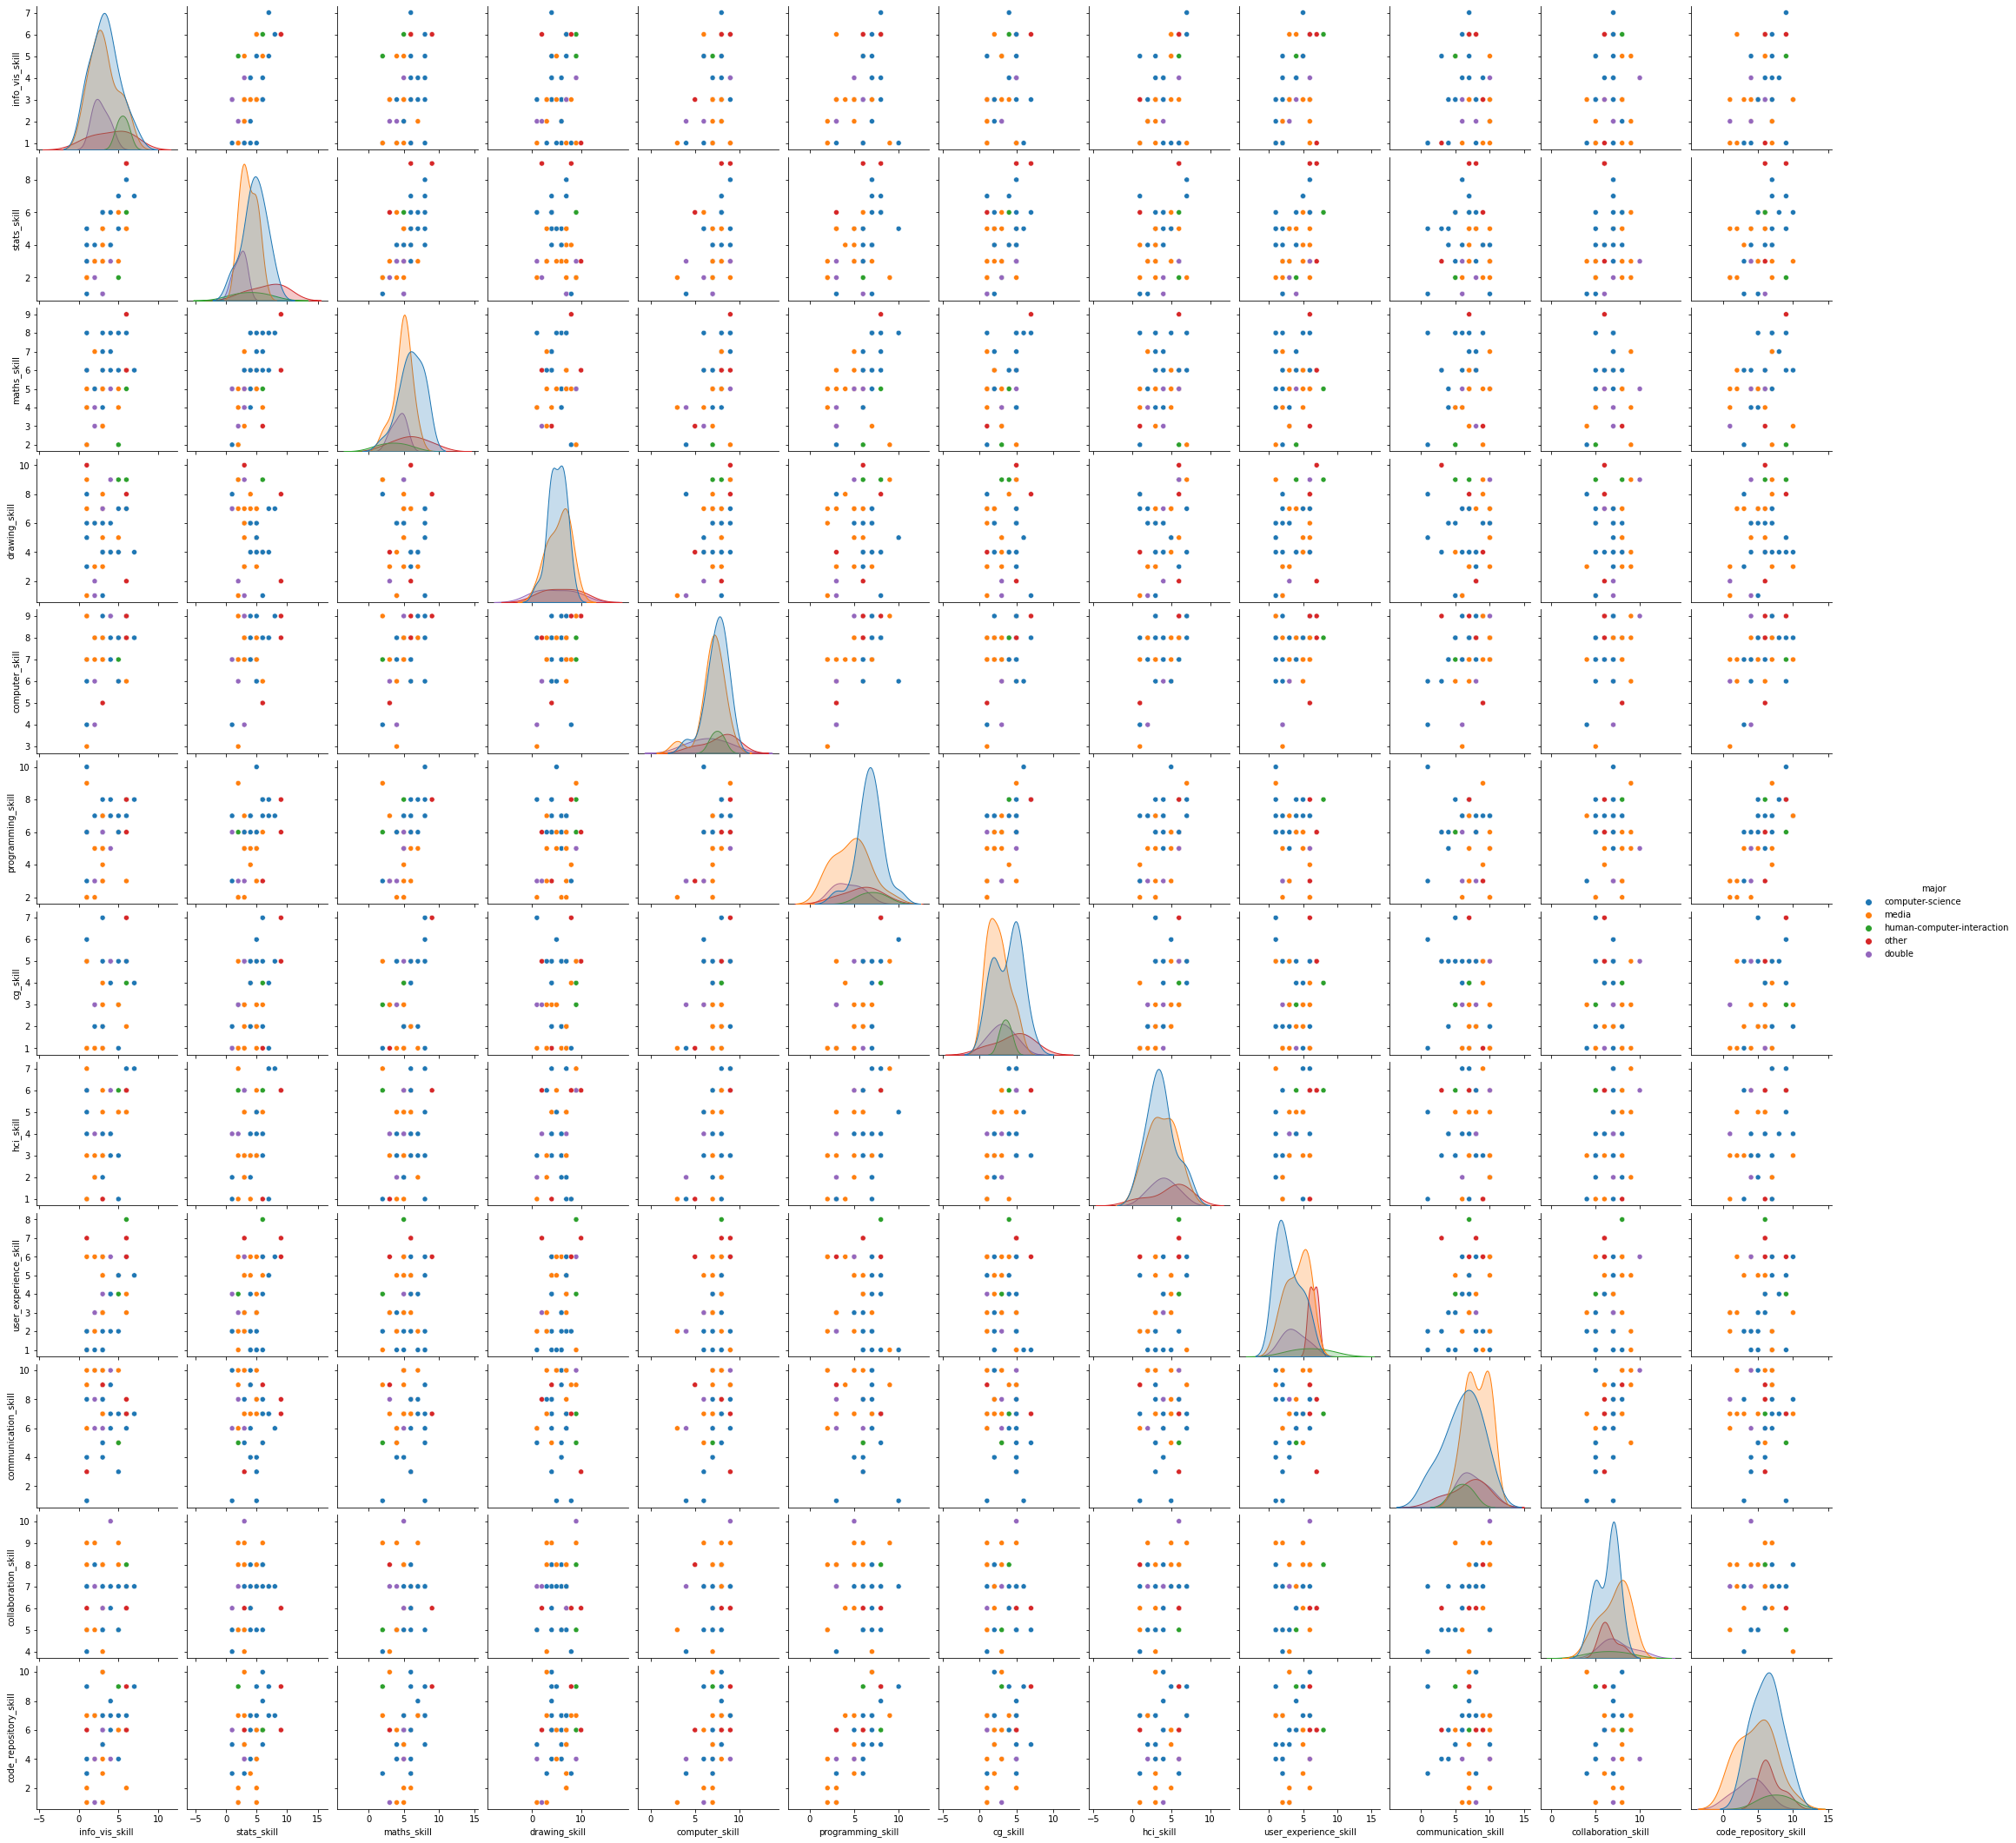

In [16]:
skills_with_major = df.drop(columns=["kth_canvas_usage", "kth_social_usage", "facebook_usage"])
sns.pairplot(skills_with_major, hue="major")

In [87]:
skills = df.drop(columns=["major", "kth_canvas_usage", "kth_social_usage", "facebook_usage"])

# scale data for mean and variance around 0
skills_scaled = StandardScaler().fit_transform(skills)

pca = PCA(n_components=2)
pca_components = pca.fit_transform(skills_scaled)

print(pca.explained_variance_ratio_)
print(pca.singular_values_)

pca_df = pd.DataFrame(data = pca_components, columns = ['pca_1', 'pca_2'], index = df.index)
pca_df = pd.concat([pca_df, df[['major']]], axis = 1)

[0.33601583 0.16416321]
[13.16754218  9.20370669]


<AxesSubplot:xlabel='pca_1', ylabel='pca_2'>

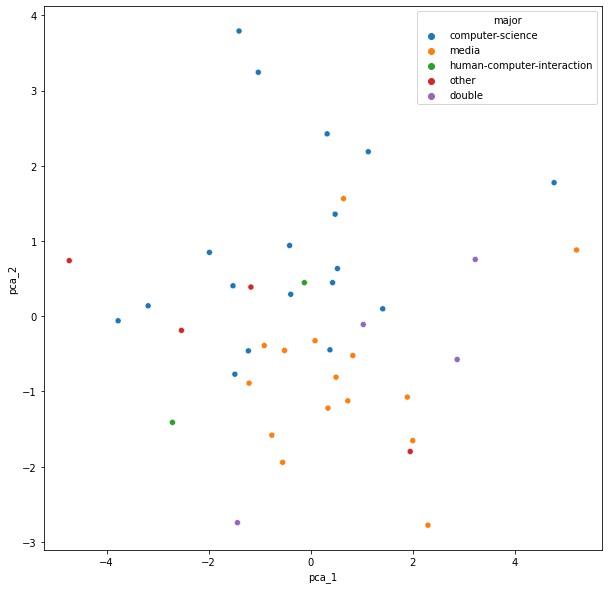

In [79]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x="pca_1", y="pca_2",
                hue="major", data=pca_df, ax=ax)

In [88]:
skills = df.drop(columns=["kth_canvas_usage", "kth_social_usage", "facebook_usage"])

# info_vis (designing charts, working with data, presenting)
# drawing (design, artistic)
# human computer interaction (design, usability, technical)
# user_experience (design, usability)
design_skills = skills[['info_vis_skill', 'drawing_skill', 'hci_skill', 'user_experience_skill']]
skills['design_skill'] = np.average(a=design_skills, axis=1)

# stats (statistics, math heavy)
# maths (maths)
# computer (technical)
# programming (technical)
# computer_graphics (technical)
# code repository (technical)
technical_skills = skills[['stats_skill', 'maths_skill','computer_skill', 'programming_skill', 'cg_skill','code_repository_skill']]
skills['technical_skill'] = np.average(a=technical_skills, axis=1)

# communication (soft skill, teamwork)
# collaboration (soft skill, teamwork)
teamwork_skills = skills[['communication_skill', 'collaboration_skill']]
skills['teamwork_skill'] = np.average(a=teamwork_skills, axis=1)

skills.head()

,major,info_vis_skill,stats_skill,maths_skill,drawing_skill,computer_skill,programming_skill,cg_skill,hci_skill,user_experience_skill,communication_skill,collaboration_skill,code_repository_skill,design_skill,technical_skill,teamwork_skill
alias,,,,,,,,,,,,,,,,
Monokuma,computer-science,3,3,4,6,8,6,5,3,3,5,5,5,3.75,5.166667,5.0
NoobKiz,computer-science,7,7,6,4,8,8,4,7,5,7,7,9,5.75,7.000000,7.0
Rella666,media,6,5,6,7,6,3,5,5,3,7,7,2,5.25,4.500000,7.0
Kropotkin42,media,3,4,5,8,7,4,4,1,6,9,6,7,4.50,5.166667,7.5
Kyrie11,media,5,6,4,4,6,6,3,5,5,5,9,6,4.75,5.166667,7.0


<AxesSubplot:xlabel='technical_skill', ylabel='design_skill'>

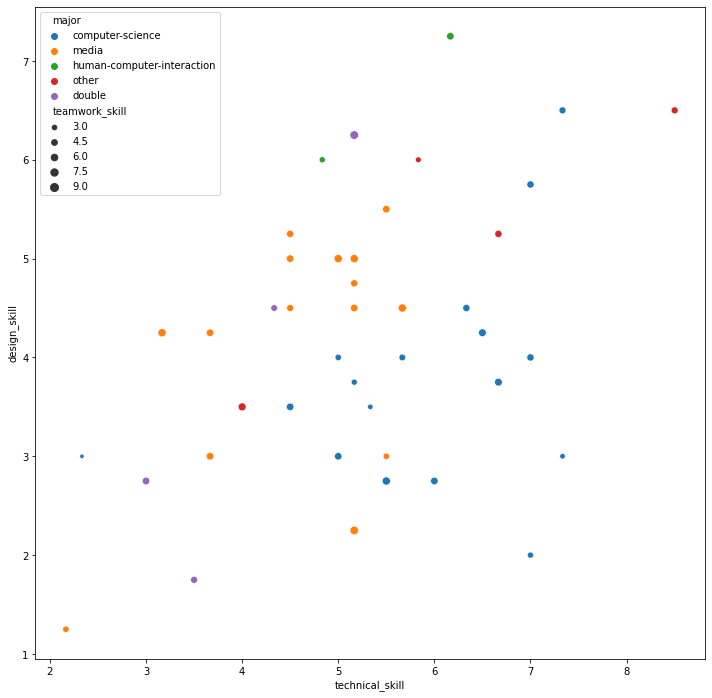

In [90]:
# Plot x/y/size
fig, ax = plt.subplots(figsize=(12,12))
sns.scatterplot(x="technical_skill", y="design_skill",
                hue="major", size="teamwork_skill", data=skills, ax=ax)

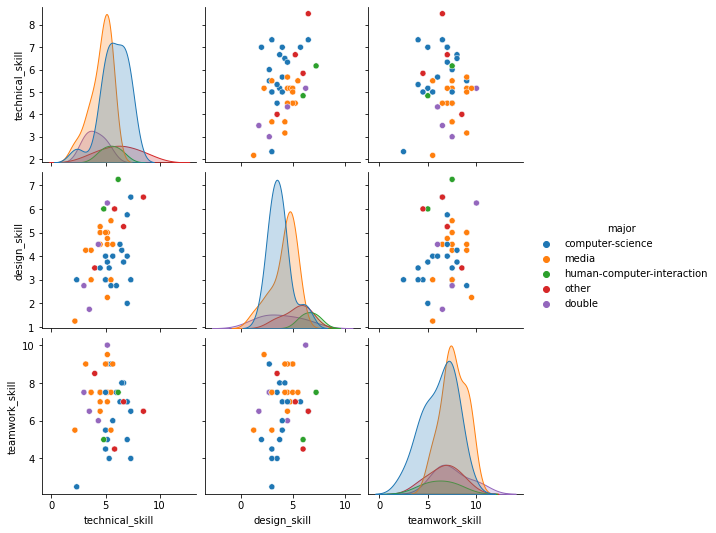

In [94]:
aggregate_skills = skills[['technical_skill', 'design_skill', 'teamwork_skill', 'major']]
sns.pairplot(aggregate_skills , hue="major")

In [5]:
df['major'].unique()

array(['computer-science', 'media', 'human-computer-interaction', 'other',
       'double'], dtype=object)